**Context**

This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . Demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

**Content**

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

**Problem Statement**
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

**Inspiration**

By the end of this case study , you would be able to answer below questions.<br>
1- How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way.<br>
2- Who are your target customers with whom you can start marketing strategy [easy to converse]<br>
3- How the marketing strategy works in real world

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()   #No missing values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## VISUALIZATION

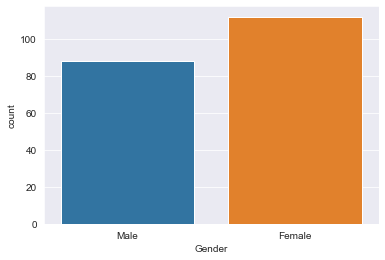

In [8]:
sns.set_style('darkgrid')
sns.countplot(data = df, x = 'Gender')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 64 Text xticklabel objects>)

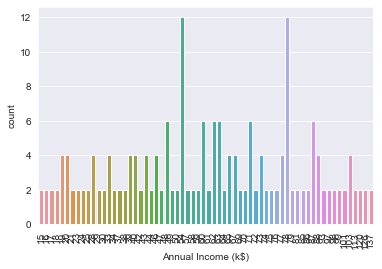

In [9]:
sns.countplot(data = df, x = 'Annual Income (k$)')
plt.xticks(rotation=90)

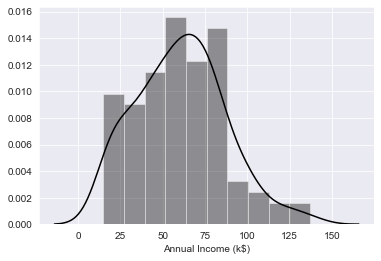

In [10]:
sns.distplot(df['Annual Income (k$)'], hist=True, color = 'black')

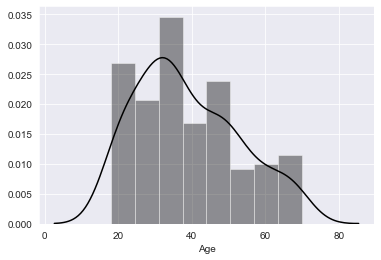

In [11]:
sns.distplot(df['Age'],hist=True, color = 'black')

In [12]:
df['Spending Score (1-100)'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
82    1
24    1
23    1
99    1
Name: Spending Score (1-100), Length: 84, dtype: int64

<Figure size 864x720 with 0 Axes>

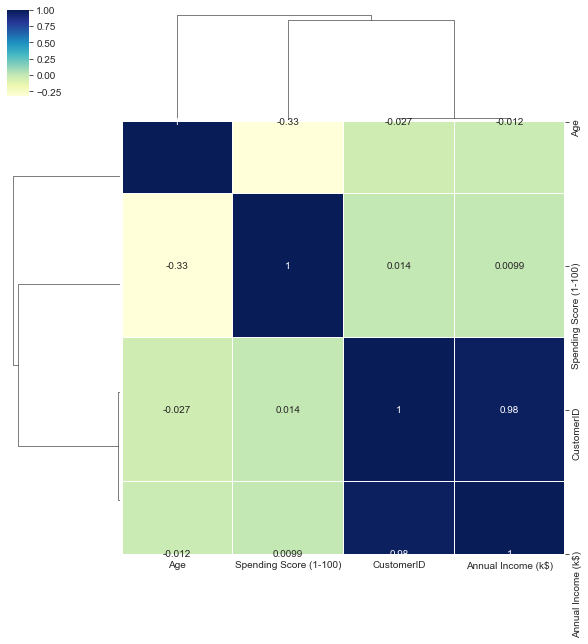

In [13]:
plt.figure(figsize=(12,10))
sns.clustermap(df.corr(),cmap='YlGnBu', linewidths=.5, annot = True)

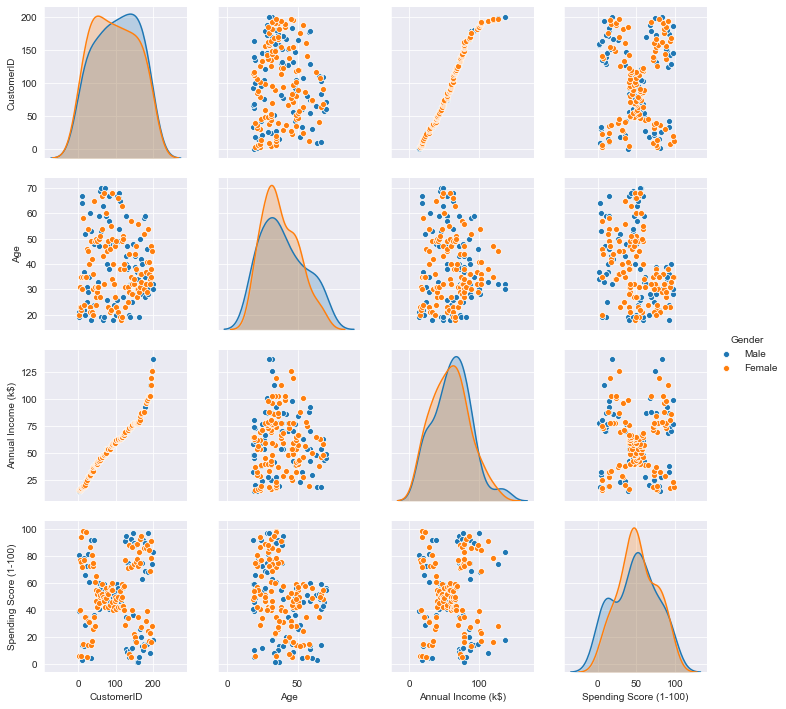

In [14]:
sns.pairplot(df,hue='Gender')

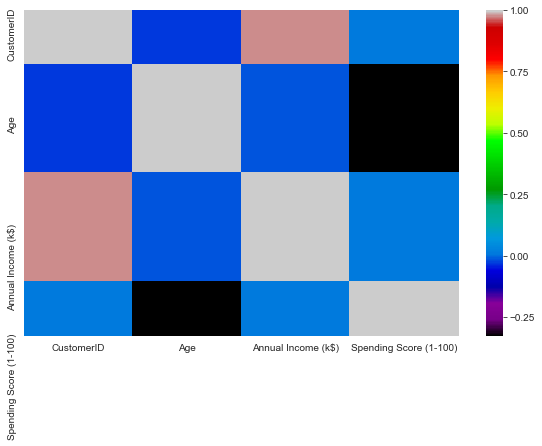

In [15]:
fig, axis = plt.subplots(figsize=(10, 6))
corr = df.corr()
sns.heatmap(corr,cmap="nipy_spectral",square=True)

In [16]:
X=df[["Age","Annual Income (k$)"]]

In [17]:
#scaling the input features
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
data_scaled=scale.fit_transform(X)


In [18]:
#using elbow method to improve accuracy
SSE=[]
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit_predict(data_scaled)
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

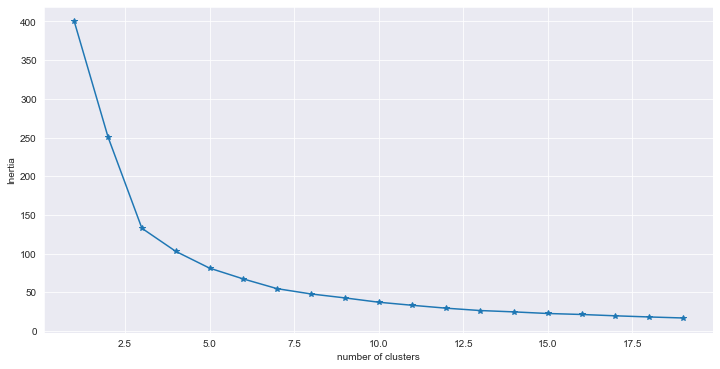

In [19]:
#converting the results into dataframe and plotting them
frame=pd.DataFrame({'cluster':range(1,20),'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['cluster'],frame['SSE'],marker='*')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')

In [20]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
#target features
target=kmeans.labels_
target

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [22]:
kmeans.cluster_centers_

array([[-0.27913465,  0.96851913],
       [-0.87474334, -0.83093616],
       [ 1.2169084 , -0.35628084]])

In [23]:
result=pd.DataFrame(X,columns=["Age","Annual Income (k$)"])
result

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


In [24]:
result["Predicted_Spending Score (1-100)"]=target
result

,Age,Annual Income (k$),Predicted_Spending Score (1-100)
0,19,15,1
1,21,15,1
2,20,16,1
3,23,16,1
4,31,17,1
...,...,...,...
195,35,120,0
196,45,126,0
197,32,126,0
198,32,137,0


In [25]:
result["original_Spending Score (1-100)"]=df["Spending Score (1-100)"]
result

,Age,Annual Income (k$),Predicted_Spending Score (1-100),original_Spending Score (1-100)
0,19,15,1,39
1,21,15,1,81
2,20,16,1,6
3,23,16,1,77
4,31,17,1,40
...,...,...,...,...
195,35,120,0,79
196,45,126,0,28
197,32,126,0,74
198,32,137,0,18


In [26]:
from sklearn.metrics import silhouette_score
silhouette_score(data_scaled, kmeans.fit_predict(data_scaled))


0.4431419612216489